## Author : Ben madani Yazid | AIS

<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET OF DATA ANALYSIS</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">FAO Study
</h2>
</div>

![FAO](https://github.com/zizou47/Data-Science-Projects/blob/main/Food%2C%20Agriculture%20Organization%20(FAO)%20analysis/FAO.png?raw=1)


# RESEARCH QUESTION

* What are the global trends in undernutrition over the past decade, and which countries have been most affected?
* How factors such as import, disponibility... correlate with undernutrition rates in different countries?
* which demographic groups have been most vulnerable? which country import most, have most disponibility... in 2017





Source of dataset : https://www.kaggle.com/code/alizechasse/fao-study/notebook

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Step 1 - Importation of librairies and loading data</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation of librairies</h3>
</div>

In [ ]:
import pandas as pd
import numpy as np

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Load csv files</h3>
</div>

In [ ]:
# population.csv
population = pd.read_csv('./data/population.csv', sep=',')

# disponibility.csv
disponibility = pd.read_csv('./data/disponibility_alim.csv', sep=',')

# alimentary.csv
alimentary = pd.read_csv('./data/alimentary.csv', sep=',')

# nutrition.csv
nutrition = pd.read_csv('./data/nutrition.csv', sep=',')


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Step 2 - EDA</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - EDA of population</h3>
</div>

In [ ]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1416 non-null   object 
 1   year        1416 non-null   int64  
 2   Population  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


* no nan values
* 1416 rows, 3 columns
* population dtype is float which need to be changed

In [ ]:
population.head()

,country,year,Population
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [ ]:
# changing population to million with int dtype
population['Population'] = population['Population'] * 1000
population['Population'] = population['Population'].astype(int)

In [ ]:
population.head()

,country,year,Population
0,Afghanistan,2013,32269589
1,Afghanistan,2014,33370794
2,Afghanistan,2015,34413603
3,Afghanistan,2016,35383032
4,Afghanistan,2017,36296113


In [ ]:
population.year.unique()

array([2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - EDA disponibility</h3>
</div>

In [ ]:
disponibility.head()

,country,product,Origin,for animals,other use,Dispo(Kcal/p/d),Dispo(kg/p/y),Dispo grasse(g/p/d),Dispo protein (g/p/d),domastic,Exportations,Importations,nutrition,Production
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,53.0
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,3.0
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN


In [ ]:
disponibility.describe(include='all')

,country,product,Origin,for animals,other use,Dispo(Kcal/p/d),Dispo(kg/p/y),Dispo grasse(g/p/d),Dispo protein (g/p/d),domastic,Exportations,Importations,nutrition,Production
count,15605,15605,15605,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.000000,12226.000000,14852.000000,14015.000000,9180.000000
unique,174,98,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Inde,Abats Comestible,vegetale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,174,11896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.293460,110.596925,87.264543,347.931359,1090.379085
std,NaN,NaN,NaN,4240.119637,5076.785816,107.287655,24.618223,3.680399,3.598686,9067.267153,1053.318990,717.372714,4475.704458,12067.344094
min,NaN,NaN,NaN,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,NaN,NaN,NaN,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.000000,0.000000,2.000000,5.000000,22.000000
75%,NaN,NaN,NaN,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.750000,9.000000,18.000000,52.000000,191.250000


In [ ]:
disponibility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                15605 non-null  object 
 1   product                15605 non-null  object 
 2   Origin                 15605 non-null  object 
 3   for animals            2720 non-null   float64
 4   other use              5496 non-null   float64
 5   Dispo(Kcal/p/d)        14241 non-null  float64
 6   Dispo(kg/p/y)          14015 non-null  float64
 7   Dispo grasse(g/p/d)    11794 non-null  float64
 8   Dispo protein (g/p/d)  11561 non-null  float64
 9   domastic               15382 non-null  float64
 10  Exportations           12226 non-null  float64
 11  Importations           14852 non-null  float64
 12  nutrition              14015 non-null  float64
 13  Production             9180 non-null   float64
dtypes: float64(11), object(3)
memory usage: 1.7+ MB


* to add more insights i replace nan values by 0 to avoid deleting columns, imputation by other methos risky cuz we have a lot
of nan values

In [ ]:
# replace NaN by 0
disponibility = disponibility.fillna(0)

In [ ]:
disponibility.head()

,country,product,Origin,for animals,other use,Dispo(Kcal/p/d),Dispo(kg/p/y),Dispo grasse(g/p/d),Dispo protein (g/p/d),domastic,Exportations,Importations,nutrition,Production
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,53.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,3.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - EDA alimentary</h3>
</div>

In [ ]:
alimentary.head()


,country,year,product,value
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [ ]:
alimentary.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  1475 non-null   object
 1   year     1475 non-null   int64 
 2   product  1475 non-null   object
 3   value    1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


* no nan values

In [ ]:
alimentary['product'].unique()

array(['Autres non-céréales', 'Blé et Farin', 'Céréales',
       'Fruits secs, total', 'Huiles végétales',
       'Légumineuses Sèches,Tot.', 'Non-céréales', 'Riz, total',
       'Sucre, total', 'Céréales Secondaires', 'Lait, total',
       'Mélanges et préparations', 'Poiss&produi', 'BulgurFarEnt',
       'Viande Total', 'Graisses Com'], dtype=object)

* we have 22 type of alimentary

In [ ]:
# multiply values from ton to kg (1000)
alimentary['value'] = alimentary['value'] * 1000


In [ ]:
alimentary.head()


,country,year,product,value
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - EDA nutrition</h3>
</div>

In [ ]:
nutrition.head()


,country,year,p/nutrition
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [ ]:
nutrition.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country      1218 non-null   object
 1   year         1218 non-null   object
 2   p/nutrition  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


* change dtype of p/nutrition into int, year into int also chose mean year

In [ ]:
nutrition.describe(include='all')

,country,year,p/nutrition
count,1218,1218,624
unique,203,6,139
top,Afghanistan,2012-2014,<0.1
freq,6,203,120


* we have <0.1, i decide to change it to 0 to avoid error while manupilate of data

In [ ]:
nutrition['p/nutrition'] = nutrition['p/nutrition'].replace(['<0.1'], 0)

In [ ]:
# change dtype
nutrition['p/nutrition'] = pd.to_numeric(nutrition['p/nutrition'])

In [ ]:
# product personne who be nutrited to millions
nutrition['p/nutrition'] = nutrition['p/nutrition'] * 1e6

In [ ]:
nutrition = nutrition.fillna(0)

In [ ]:
nutrition['p/nutrition'] = nutrition['p/nutrition'].astype(int)

In [ ]:
nutrition['year'] = nutrition['year'].replace(['2012-2014'], 2013)
nutrition['year'] = nutrition['year'].replace(['2013-2015'], 2014)
nutrition['year'] = nutrition['year'].replace(['2014-2016'], 2015)
nutrition['year'] = nutrition['year'].replace(['2015-2017'], 2016)
nutrition['year'] = nutrition['year'].replace(['2016-2018'], 2017)

In [ ]:
nutrition.head()


,country,year,p/nutrition
0,Afghanistan,2013,8600000
1,Afghanistan,2014,8800000
2,Afghanistan,2015,8900000
3,Afghanistan,2016,9700000
4,Afghanistan,2017,10500000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Number, Proportion pop who are undernourished in 2017</h3>
</div>

In [ ]:
pop_2017 = population.loc[population['year'] == 2017]
pop_2017 = pop_2017.copy()

In [ ]:
nutrition_2017 = nutrition.loc[nutrition['year'] == 2017]
nutrition_2017 = nutrition_2017.copy()

In [ ]:
# join df for 2017
nut_pop2017 = pd.merge(pop_2017, nutrition_2017, on=('year', 'country'))
nut_pop2017.drop('year',axis=1, inplace=True)

In [ ]:
nut_pop2017.head()

,country,Population,p/nutrition
0,Afghanistan,36296113,10500000
1,Afrique du Sud,57009756,3100000
2,Albanie,2884169,100000
3,Algérie,41389189,1300000
4,Allemagne,82658409,0


In [ ]:
total_pop_nut = nut_pop2017.Population.sum()

In [ ]:
print("the number of total population who be nutrited {}".format((total_pop_nut/1e9).round(2)), 'millard')

the number of total population who be nutrited 7.54 millard


In [ ]:
prop_pop_nut =  nut_pop2017['p/nutrition'].sum()/ total_pop_nut * 100
print("The proportion of the world population being undernourished in 2017 is : {}".format((prop_pop_nut).round(2)), '%')

The proportion of the world population being undernourished in 2017 is : 7.1 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 -Theoretical number of people who could be fed in 2017</h3>
</div>

* how many calories take by person is 2500 kcal source : https://www.healthhub.sg/live-healthy/how-much-to-eat-at-each-meal

In [ ]:
# we take disponability by kcal, kg by person
dispo_person_2017 = disponibility[['country','Dispo(Kcal/p/d)', 'Dispo(kg/p/y)']]
dispo_person_2017 = dispo_person_2017.copy()
dispo_person_2017['Dispo(Kcal/p/y)'] = dispo_person_2017['Dispo(Kcal/p/d)'] * 365 # day to year
dispo_person_2017.drop('Dispo(Kcal/p/d)',axis=1, inplace=True)
dispo_person_2017.head()

,country,Dispo(kg/p/y),Dispo(Kcal/p/y)
0,Afghanistan,1.72,1825.0
1,Afghanistan,1.29,365.0
2,Afghanistan,0.06,365.0
3,Afghanistan,0.00,0.0
4,Afghanistan,2.70,1460.0


In [ ]:
dispo_alim_country = dispo_person_2017[['country','Dispo(Kcal/p/y)']]
dispo_alim_country = dispo_alim_country.groupby(['country']).sum()

In [ ]:
dispo_alim_country.head()

,Dispo(Kcal/p/y)
country,
Afghanistan,761755.0
Afrique du Sud,1102300.0
Albanie,1163620.0
Algérie,1201945.0
Allemagne,1278595.0


In [ ]:
dispo_kcal_pop17 = pd.merge(dispo_alim_country, pop_2017, on = ('country'))
dispo_kcal_pop17 = dispo_kcal_pop17.drop(['year'], axis=1)
dispo_kcal_pop17.head()

,country,Dispo(Kcal/p/y),Population
0,Afghanistan,761755.0,36296113
1,Afrique du Sud,1102300.0,57009756
2,Albanie,1163620.0,2884169
3,Algérie,1201945.0,41389189
4,Allemagne,1278595.0,82658409


In [ ]:
#Calculate alimentary disponibility in the world in 2017
diso_alim_2017 = ((dispo_kcal_pop17['Dispo(Kcal/p/y)']) * (dispo_kcal_pop17['Population'])).sum()
print("the alimentary disponibility in the world in 2017 is : ",diso_alim_2017," Kcal.")


the alimentary disponibility in the world in 2017 is :  7635429382287555.0  Kcal.


In [ ]:
#possible hman to be nutrited is : disponability in ther year /what every person need per year
kcal_needed = 2500 * 356  # = 890000 kcal per year
possible_human_nutrited = (diso_alim_2017 /kcal_needed).round(0)
print('in 2017 we can feed',possible_human_nutrited, 'persons')

in 2017 we can feed 8579134137.0 persons


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Theoretical number of people who could be fed with vegetable products</h3>
</div>

In [ ]:
#selec features and only vegetable origin
dispo_alim_veg = disponibility[['country','product','Origin','Dispo(Kcal/p/d)']]
dispo_alim_veg = dispo_alim_veg.copy()
dispo_alim_veg['Dispo(Kcal/p/y)'] = dispo_alim_veg['Dispo(Kcal/p/d)'] * 356
dispo_alim_veg = dispo_alim_veg.loc[dispo_alim_veg.Origin == 'vegetale']
dispo_alim_veg.drop('Origin',axis=1, inplace=True)

dispo_alim_veg.head()

,country,product,Dispo(Kcal/p/d),Dispo(Kcal/p/y)
1,Afghanistan,"Agrumes, Autres",1.0,356.0
2,Afghanistan,Aliments pour enfants,1.0,356.0
3,Afghanistan,Ananas,0.0,0.0
4,Afghanistan,Bananes,4.0,1424.0
6,Afghanistan,Bière,0.0,0.0


In [ ]:
pop_dispo_alim_veg = pd.merge(dispo_alim_veg, pop_2017, how = 'inner', on= ('country'))
pop_dispo_alim_veg

,country,product,Dispo(Kcal/p/d),Dispo(Kcal/p/y),year,Population
0,Afghanistan,"Agrumes, Autres",1.0,356.0,2017,36296113
1,Afghanistan,Aliments pour enfants,1.0,356.0,2017,36296113
2,Afghanistan,Ananas,0.0,0.0,2017,36296113
3,Afghanistan,Bananes,4.0,1424.0,2017,36296113
4,Afghanistan,Bière,0.0,0.0,2017,36296113
...,...,...,...,...,...,...
11746,Îles Salomon,Sésame,0.0,0.0,2017,636039
11747,Îles Salomon,Thé,0.0,0.0,2017,636039
11748,Îles Salomon,Tomates,0.0,0.0,2017,636039
11749,Îles Salomon,Vin,0.0,0.0,2017,636039


In [ ]:
total_dispo_veg = pop_dispo_alim_veg['Dispo(Kcal/p/d)'] * pop_dispo_alim_veg['Population']* 365
print('the disponability of vegetable products in the world in 2017 is : ', total_dispo_veg.sum(), 'Kcal')

the disponability of vegetable products in the world in 2017 is :  6300178932059760.0 Kcal


In [ ]:
#Calculate humans can be nutrited by vegetable product
dispo_vege_pers = total_dispo_veg.sum() / kcal_needed
prop_human_nutrited_vegetable = (dispo_vege_pers * 100/ total_pop_nut)

print('propurtion human can be nutrited with vegetable products is :', prop_human_nutrited_vegetable.round(2), '%')
print('the number of human can be nutrited by vegetable product is : ',dispo_vege_pers.round(0), 'person' )

propurtion human can be nutrited with vegetable products is : 93.84 %
the number of human can be nutrited by vegetable product is :  7078852733.0 person


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Using domestic availability</h3>
</div>

In [ ]:
disponibility.head()

,country,product,Origin,for animals,other use,Dispo(Kcal/p/d),Dispo(kg/p/y),Dispo grasse(g/p/d),Dispo protein (g/p/d),domastic,Exportations,Importations,nutrition,Production
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,53.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,3.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0


In [ ]:
# 1.Proportion of animal feed :
prop_alim_animal = (disponibility["for animals"].sum()/disponibility["domastic"].sum()*100).round(1)
print("The Proportion of global domestic availability that is attributed to animal feed is : ",prop_alim_animal, "%")

The Proportion of global domestic availability that is attributed to animal feed is :  13.2 %


In [ ]:
# 2. Proportion alimentation humaine :
prop_alim_humaine = (disponibility["nutrition"].sum() /disponibility["domastic"].sum()*100).round(1)
print("The Proportion of global domestic availability that is attributed to human feed is : ",prop_alim_humaine, "%")

The Proportion of global domestic availability that is attributed to human feed is :  49.5 %


In [ ]:
# 3. Proportion alimentation other use:
prop_alim_autre = (disponibility["other use"].sum() /disponibility["domastic"].sum()*100).round(1)
print("The Proportion of global domestic availability that is attributed to other use is : ",prop_alim_autre, "%")

The Proportion of global domestic availability that is attributed to other use is :  8.8 %


In [ ]:
# 4.Proportion alimentation Exportations :
prop_alim_exp = (disponibility["Exportations"].sum() /disponibility["domastic"].sum()*100).round(2)
print("The Proportion of global domestic availability that is attributed to Exportations use is : ",prop_alim_exp, "%")

The Proportion of global domestic availability that is attributed to Exportations use is :  13.73 %


In [ ]:
# 5.Proportion alimentation Importations :
prop_alim_exp = (disponibility["Importations"].sum() /disponibility["domastic"].sum()*100).round(2)
print("The Proportion of global domestic availability that is attributed to Importations use is : ",prop_alim_exp, "%")

The Proportion of global domestic availability that is attributed to Importations use is :  13.16 %


##  Visualisations

In [ ]:
animal_alim_mean = disponibility["for animals"].mean()
human_alim_mean = disponibility["nutrition"].mean()

In [ ]:
values = [animal_alim_mean, human_alim_mean]
labels = ["alim_for animals", "alim_for human"]

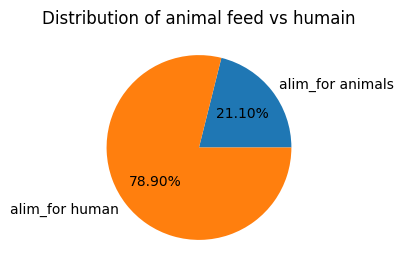

In [ ]:
plt.figure(figsize=(6,3))
plt.pie(x = values, labels = labels, autopct='%.2f%%')
plt.title("Distribution of animal feed vs humain")

plt.show()

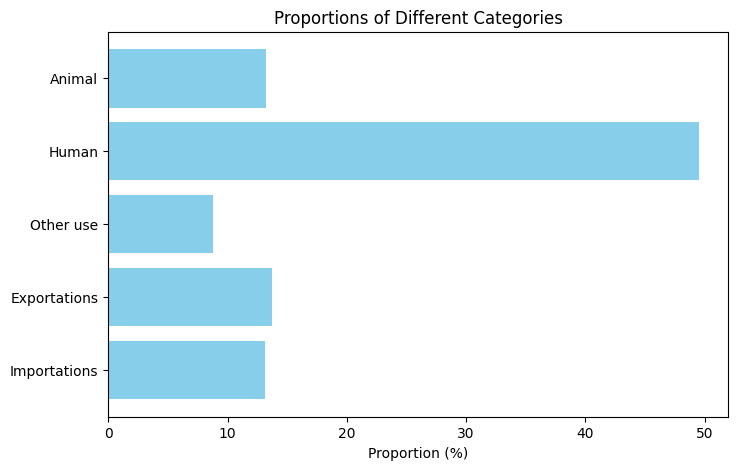

In [ ]:
import matplotlib.pyplot as plt

# Categories and corresponding proportions
categories = ['Animal', 'Human', 'Other use', 'Exportations', 'Importations']
proportions = [13.2, 49.5, 8.8, 13.73, 13.16]

# Plot
plt.figure(figsize=(8, 5))
plt.barh(categories, proportions, color='skyblue')
plt.xlabel('Proportion (%)')
plt.title('Proportions of Different Categories')
plt.gca().invert_yaxis()
plt.show()


* Conclution of this part :
 The FAO allocates its resources primarily towards addressing human consumption needs (49.5%) and supporting animal-related agriculture (13.2%). Additionally, significant proportions are designated for specific program expenses (Exportations: 13.73% and Importations: 13.16%). Minor resources are dedicated to other operational costs (8.8%).

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Countries with the highest proportion of undernourished people in 2017</h3>
</div>

In [ ]:
nut_pop2017['% prop_nut'] = ((nut_pop2017['p/nutrition'] / nut_pop2017.Population)*100).round(2)
nut_pop2017 = nut_pop2017.sort_values(by =['% prop_nut'], ascending = False)
nut_pop2017.head(10)

,country,Population,p/nutrition,% prop_nut
78,Haïti,10982366,5300000,48.26
157,République populaire démocratique de Corée,25429825,12000000,47.19
108,Madagascar,25570512,10500000,41.06
103,Libéria,4702226,1800000,38.28
100,Lesotho,2091534,800000,38.25
183,Tchad,15016753,5700000,37.96
161,Rwanda,11980961,4200000,35.06
121,Mozambique,28649018,9400000,32.81
186,Timor-Leste,1243258,400000,32.17
0,Afghanistan,36296113,10500000,28.93


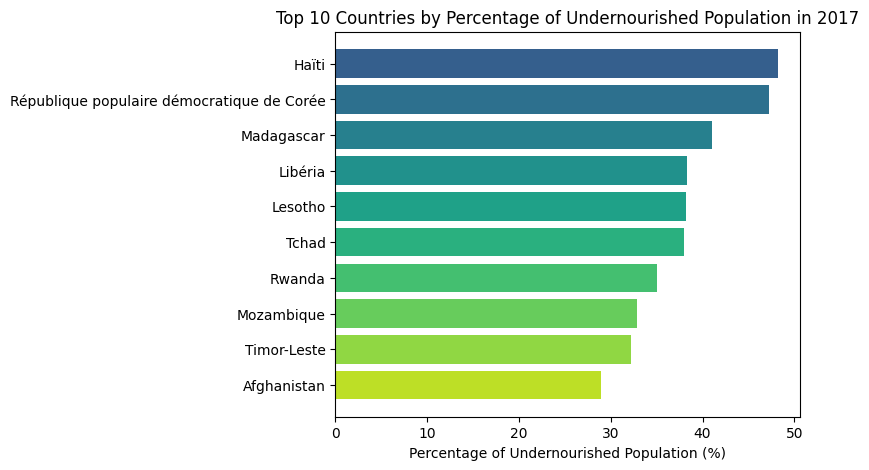

In [ ]:
nut_pop2017 = nut_pop2017.sort_values(by='% prop_nut', ascending=False)
top_countries = nut_pop2017.head(10)

plt.figure(figsize=(6, 5))
plt.barh(top_countries['country'], top_countries['% prop_nut'], color=plt.cm.viridis(np.linspace(0.3, 0.9, 10)))
plt.xlabel('Percentage of Undernourished Population (%)')
plt.title('Top 10 Countries by Percentage of Undernourished Population in 2017')
plt.gca().invert_yaxis()
plt.show()

* we can see most contries is poor contries who have wars

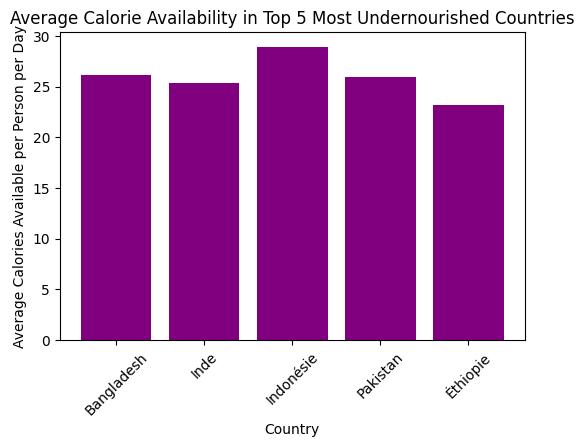

,country,Dispo(Kcal/p/d)
0,Bangladesh,26.095745
1,Inde,25.298969
2,Indonésie,28.916667
3,Pakistan,25.936170
4,Éthiopie,23.141304


In [ ]:
# Calculate the average calorie availability per person per day for the top undernourished countries
calorie_availability = disponibility[disponibility['country'].isin(top_countries)]
average_calories_by_country = calorie_availability.groupby('country')['Dispo(Kcal/p/d)'].mean().reset_index()

# Plotting average calorie availability
plt.figure(figsize=(6, 4))
plt.bar(average_calories_by_country['country'], average_calories_by_country['Dispo(Kcal/p/d)'], color='purple')
plt.title('Average Calorie Availability in Top 5 Most Undernourished Countries')
plt.xlabel('Country')
plt.ylabel('Average Calories Available per Person per Day')
plt.xticks(rotation=45)
plt.show()

# Display the data
average_calories_by_country


* we can see contries Undernourished have problem in kcal disponibility

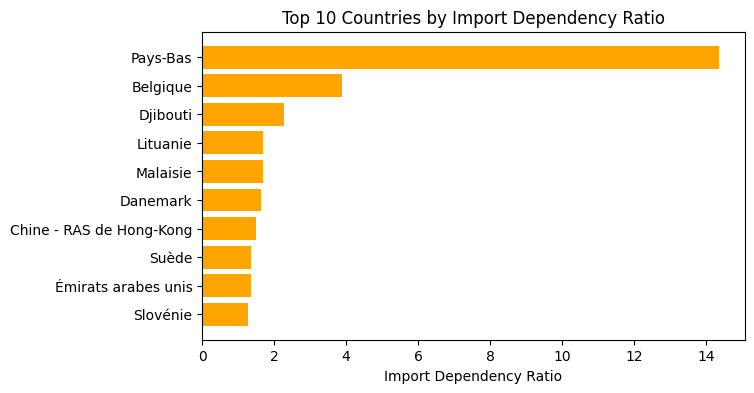

,country,Import Dependency Ratio
119,Pays-Bas,14.359440
16,Belgique,3.894686
45,Djibouti,2.259106
88,Lituanie,1.692001
92,Malaisie,1.682906
44,Danemark,1.643323
33,Chine - RAS de Hong-Kong,1.502424
148,Suède,1.364403
169,Émirats arabes unis,1.355949
143,Slovénie,1.280840


In [ ]:
disponibility['Import Dependency Ratio'] = disponibility['Importations'] / disponibility['domastic']

import_dependency_data = disponibility[['country', 'Import Dependency Ratio']].replace([np.inf, -np.inf], np.nan).dropna()

average_import_dependency = import_dependency_data.groupby('country')['Import Dependency Ratio'].mean().reset_index()

top_import_dependency_countries = average_import_dependency.sort_values(by='Import Dependency Ratio', ascending=False).head(10)


plt.figure(figsize=(7, 4))
plt.barh(top_import_dependency_countries['country'], top_import_dependency_countries['Import Dependency Ratio'], color='orange')
plt.title('Top 10 Countries by Import Dependency Ratio')
plt.xlabel('Import Dependency Ratio')
plt.gca().invert_yaxis()
plt.show()

# Display the data
top_import_dependency_countries


* netherland most contry import food duo to people have good income and kcal dispo per person
* other contries either poorly or duo to income per person

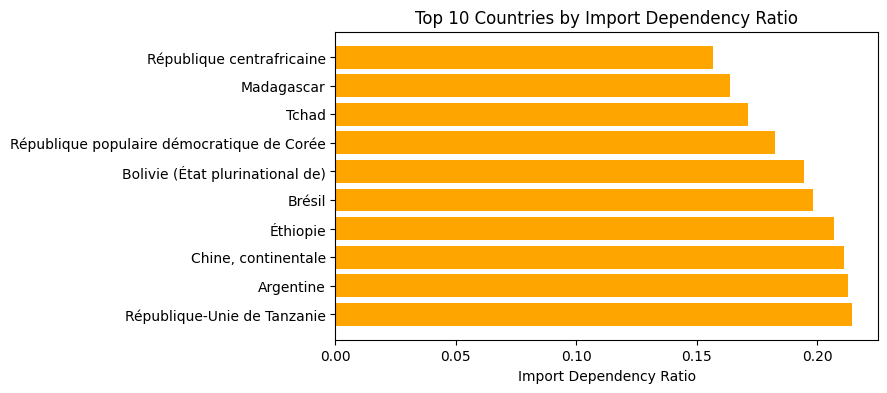

,country,Import Dependency Ratio
128,République centrafricaine,0.156666
91,Madagascar,0.163595
151,Tchad,0.171059
133,République populaire démocratique de Corée,0.182508
19,Bolivie (État plurinational de),0.194340
23,Brésil,0.198129
172,Éthiopie,0.207027
36,"Chine, continentale",0.211185
8,Argentine,0.212845
134,République-Unie de Tanzanie,0.214471


In [ ]:
#sorting of the 10 worst import
disponibility['Import Dependency Ratio'] = disponibility['Importations'] / disponibility['domastic']

import_dependency_data = disponibility[['country', 'Import Dependency Ratio']].replace([np.inf, -np.inf], np.nan).dropna()

average_import_dependency = import_dependency_data.groupby('country')['Import Dependency Ratio'].mean().reset_index()

top_import_dependency_countries = average_import_dependency.sort_values(by='Import Dependency Ratio', ascending=True).head(10)


plt.figure(figsize=(7, 4))
plt.barh(top_import_dependency_countries['country'], top_import_dependency_countries['Import Dependency Ratio'], color='orange')
plt.title('Flop 10 Countries by Import Dependency Ratio')
plt.xlabel('Import Dependency Ratio')
plt.gca().invert_yaxis()
plt.show()

# Display the data
top_import_dependency_countries


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Countries that have benefited the most from food aid since 2013</h3>
</div>

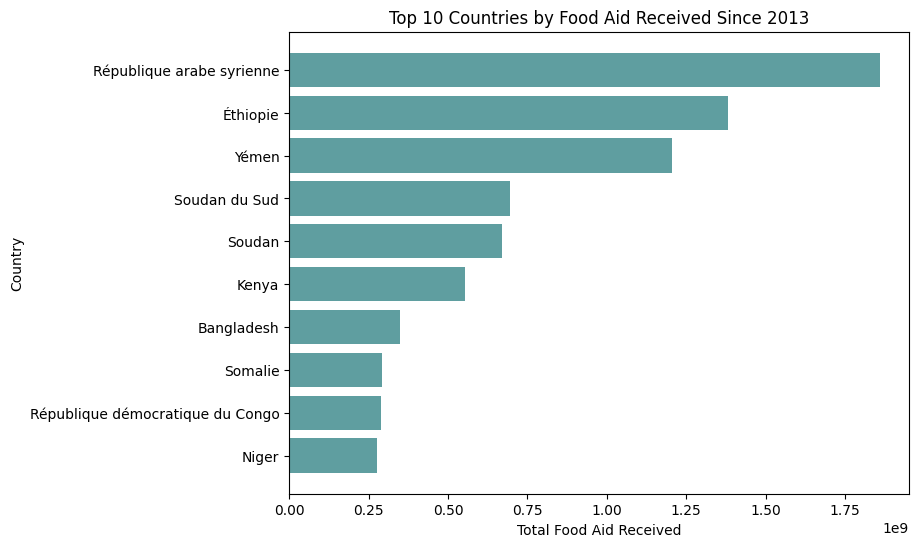

In [ ]:
# Plotting the top countries by food aid received
plt.figure(figsize=(8, 6))
plt.barh(top_food_aid_countries['country'], top_food_aid_countries['value'], color='cadetblue')
plt.xlabel('Total Food Aid Received')
plt.ylabel('Country')
plt.title('Top 10 Countries by Food Aid Received Since 2013')
plt.gca().invert_yaxis()
plt.show()



* all contries Countries by Food Aid Received Since 2013 have political problems (africa, asia)
* syria most contry get aid since 2013 duo to the civil war started in 2011

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution of the 5 countries which benefited the most from food aid between 2013 and 2016</h3>
</div>

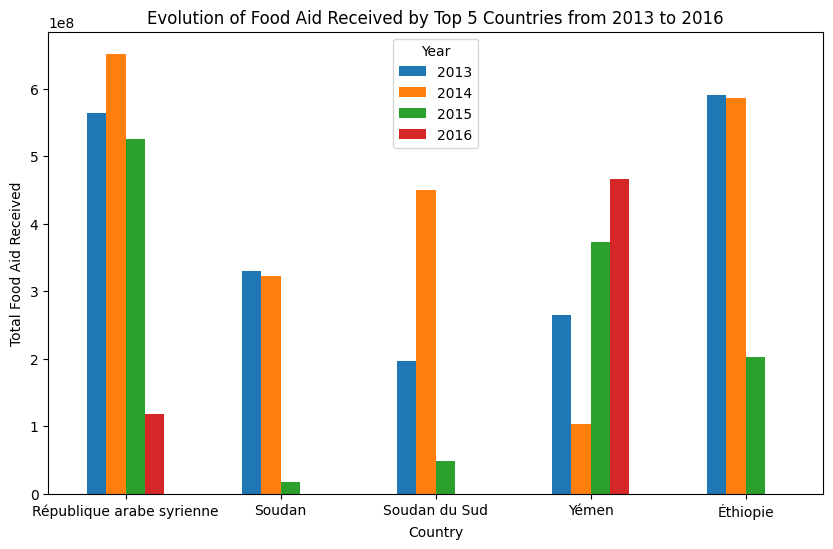

In [ ]:
# Filter the data for the top 5 countries and the years 2013 to 2016
food_aid_since_2013 = alimentary[alimentary['year'] >= 2013].groupby('country')['value'].sum().reset_index()

# Sort the countries based on the total food aid received in descending order
top_food_aid_countries = food_aid_since_2013.sort_values(by='value', ascending=False).head(10)
top_5_countries = top_food_aid_countries['country'].head(5)
filtered_data = alimentary[(alimentary['country'].isin(top_5_countries)) & (alimentary['year'] >= 2013) & (alimentary['year'] <= 2016)]

# Group by country and year
evolution_aid = filtered_data.groupby(['country', 'year'])['value'].sum().unstack()


evolution_aid.plot(kind='bar', figsize=(10, 6))
plt.title('Evolution of Food Aid Received by Top 5 Countries from 2013 to 2016')
plt.xlabel('Country')
plt.ylabel('Total Food Aid Received')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.show()

* syrian most contry get aid food by time because of the war period
* there is correlation between aid feed and political situation in the country, if war continue the country will get food aid

In [ ]:
import plotly.express as px

# Create a world map with interactive labels for each data column
fig = px.choropleth(nut_pop2017,
                    locations="country",
                    locationmode='country names',
                    color="% prop_nut",
                    hover_name="country",
                    hover_data=["Population", "p/nutrition", "% prop_nut"],
                    title="World Map Showing Nutrition Data",
                    color_continuous_scale=px.colors.sequential.Plasma)

# Update layout to add dropdown for different labels
button_layer_1_height = 1.12
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{"hovertext": [nut_pop2017["Population"]]},
                          {"hoverinfo": "text+name"}],
                    label="Population",
                    method="update"
                ),
                dict(
                    args=[{"hovertext": [nut_pop2017["p/nutrition"]]},
                          {"hoverinfo": "text+name"}],
                    label="People with Nutrition Issues",
                    method="update"
                ),
                dict(
                    args=[{"hovertext": [nut_pop2017["% prop_nut"]]},
                          {"hoverinfo": "text+name"}],
                    label="Percentage with Nutrition Issues",
                    method="update"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.11,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top"
        ),
    ]
)

fig.show()


* we can see that most countries have nutrition problem is contries have wars, big population
* most of this contries located in africa, asia and some of them in south of america

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Step 6 - Statistic tests</h2>
</div>

In [ ]:
from scipy.stats import pearsonr

# Pearson Correlation between 'Population_x' and 'p/nutrition'
pearson_corr, p_value = pearsonr(df2['Population_x'], df2['p/nutrition'])

pearson_corr, p_value

(0.6699620202698333, 0.0)

* i apply pearson test with two quantitative variable, we see positive correlation R² =0.669

 which means if contry have big population, it will need feed aid.

In [ ]:
# Pearson Correlation between 'Population_x' and 'p/nutrition'
pearson_corr, p_value = pearsonr(df2['domastic'], df2['Production'])

pearson_corr, p_value

(0.9917484523548546, 0.0)

* i apply pearson test with two quantitative variable, we see positive correlation R² =0.99

 which means if contry have big Production,realise alimenatry security.

# Conclution
The 2017 FAO data reveals critical insights into global food security and distribution. Approximately 7.1% of the global population was undernourished, despite a global caloric surplus sufficient to feed over 8.57 billion people. The majority of available calories (93.84%) came from plant-based sources, capable of nourishing about 7.08 billion people. Notably, a significant portion of global calories was allocated to non-human consumption, including 13.2% for animal feed and 13.73% for exports. Countries with the highest rates of undernourishment often faced economic hardships and conflicts, highlighting a strong link between political instability and food insecurity. The top import-dependent countries varied widely, from wealthy nations like the Netherlands to poorer regions, underscoring diverse challenges in global food distribution. The correlation between political instability and the necessity for food aid was pronounced, especially in parts of Africa and Asia, suggesting that achieving food security globally requires addressing both political and economic disparities.